In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Set the path to your dataset
train_data_dir = './Pistachio_Image_Dataset/'
input_shape = (224, 224)
batch_size = 32
num_classes = 2

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

test_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 1719 images belonging to 2 classes.
Found 429 images belonging to 2 classes.


# 1. Build the CNN model

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(input_shape[0], input_shape[1], 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
# Train the model
epochs = 20  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs, validation_data=test_generator
)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
53/53 [==============================] - ETA: 0s - loss: 0.5728 - accuracy: 0.6918WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002573A35A288> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

In [5]:
# Generate predictions for the train data
train_pred = model.predict(train_generator)
train_pred_labels = np.argmax(train_pred, axis=1)  # Assuming the predicted probabilities are in one-hot encoded format

# Collect the true class labels for the train data
train_true_labels = train_generator.classes

# Compute the confusion matrix for the train data
train_cm = classification_report(train_true_labels, train_pred_labels)

# Generate predictions for the test data
test_pred = model.predict(test_generator)
test_pred_labels = np.argmax(test_pred, axis=1)  # Assuming the predicted probabilities are in one-hot encoded format

# Collect the true class labels for the test data
test_true_labels = test_generator.classes

# Compute the confusion matrix for the test data
test_cm = classification_report(test_true_labels, test_pred_labels)

print("Confusion Matrix (Train Data):")
print(train_cm)

print("Confusion Matrix (Test Data):")
print(test_cm)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
54/54 [==============================] - 179s 3s/step


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


14/14 [==============================] - 44s 3s/step
Confusion Matrix (Train Data):
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       986
           1       0.00      0.00      0.00       733

    accuracy                           0.57      1719
   macro avg       0.29      0.50      0.36      1719
weighted avg       0.33      0.57      0.42      1719

Confusion Matrix (Test Data):
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       246
           1       0.00      0.00      0.00       183

    accuracy                           0.57       429
   macro avg       0.29      0.50      0.36       429
weighted avg       0.33      0.57      0.42       429



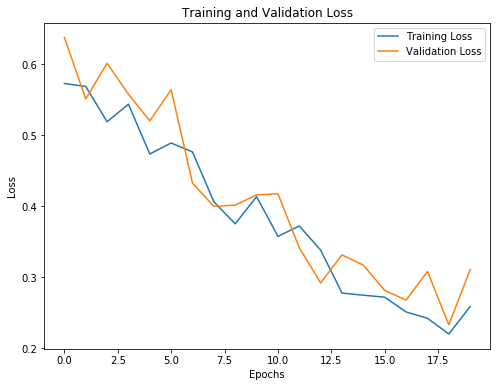

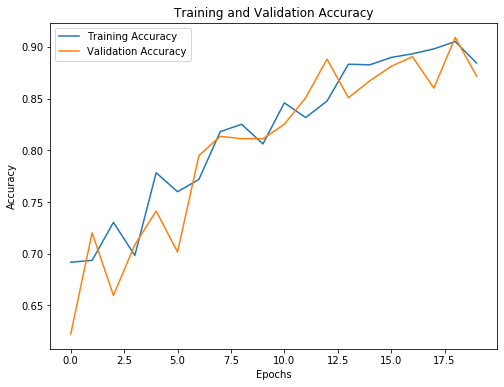

In [6]:
# Get the training loss and accuracy values from the history object
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Get the validation loss and accuracy values from the history object
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 2. VGG Net

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in vgg_model.layers:
    layer.trainable = False

# Add a custom classification head on top of the pre-trained model
flatten = Flatten()(vgg_model.output)
dense1 = Dense(256, activation='relu')(flatten)
output = Dense(1, activation='sigmoid')(dense1)

# Create the final model
model = Model(inputs=vgg_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
# Train the model
epochs = 20  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs, validation_data=test_generator
)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
53/53 [==============================] - ETA: 0s - loss: 0.8625 - accuracy: 0.6651WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000025739153D38> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

KeyboardInterrupt: 

In [ ]:
# Generate predictions for the train data
train_pred = model.predict(train_generator)
train_pred_labels = np.argmax(train_pred, axis=1)  # Assuming the predicted probabilities are in one-hot encoded format

# Collect the true class labels for the train data
train_true_labels = train_generator.classes

# Compute the confusion matrix for the train data
train_cm = classification_report(train_true_labels, train_pred_labels)

# Generate predictions for the test data
test_pred = model.predict(test_generator)
test_pred_labels = np.argmax(test_pred, axis=1)  # Assuming the predicted probabilities are in one-hot encoded format

# Collect the true class labels for the test data
test_true_labels = test_generator.classes

# Compute the confusion matrix for the test data
test_cm = classification_report(test_true_labels, test_pred_labels)

print("Confusion Matrix (Train Data):")
print(train_cm)

print("Confusion Matrix (Test Data):")
print(test_cm)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 7/54 [==>...........................] - ETA: 1:46:29

In [ ]:
# Get the training loss and accuracy values from the history object
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Get the validation loss and accuracy values from the history object
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig()

## 3. ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in resnet_model.layers:
    layer.trainable = False

# Add a custom classification head on top of the pre-trained model
flatten = Flatten()(resnet_model.output)
dense1 = Dense(256, activation='relu')(flatten)
output = Dense(1, activation='sigmoid')(dense1)

# Create the final model
model = Model(inputs=resnet_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

In [ ]:
# Train the model
epochs = 20  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs, validation_data=test_generator
)

In [ ]:
# Generate predictions for the train data
train_pred = model.predict(train_generator)
train_pred_labels = np.argmax(train_pred, axis=1)  # Assuming the predicted probabilities are in one-hot encoded format

# Collect the true class labels for the train data
train_true_labels = train_generator.classes

# Compute the confusion matrix for the train data
train_cm = classification_report(train_true_labels, train_pred_labels)

# Generate predictions for the test data
test_pred = model.predict(test_generator)
test_pred_labels = np.argmax(test_pred, axis=1)  # Assuming the predicted probabilities are in one-hot encoded format

# Collect the true class labels for the test data
test_true_labels = test_generator.classes

# Compute the confusion matrix for the test data
test_cm = classification_report(test_true_labels, test_pred_labels)

print("Confusion Matrix (Train Data):")
print(train_cm)

print("Confusion Matrix (Test Data):")
print(test_cm)

In [ ]:
# Get the training loss and accuracy values from the history object
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Get the validation loss and accuracy values from the history object
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig()

## 4. MobileNet

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the pre-trained MobileNetV2 model
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in mobilenet_model.layers:
    layer.trainable = False

# Add a custom classification head on top of the pre-trained model
global_avg_pooling = GlobalAveragePooling2D()(mobilenet_model.output)
dense1 = Dense(256, activation='relu')(global_avg_pooling)
output = Dense(1, activation='sigmoid')(dense1)

# Create the final model
model = Model(inputs=mobilenet_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

In [ ]:
# Train the model
epochs = 20  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs, validation_data=test_generator
)

In [ ]:
# Generate predictions for the train data
train_pred = model.predict(train_generator)
train_pred_labels = np.argmax(train_pred, axis=1)  # Assuming the predicted probabilities are in one-hot encoded format

# Collect the true class labels for the train data
train_true_labels = train_generator.classes

# Compute the confusion matrix for the train data
train_cm = classification_report(train_true_labels, train_pred_labels)

# Generate predictions for the test data
test_pred = model.predict(test_generator)
test_pred_labels = np.argmax(test_pred, axis=1)  # Assuming the predicted probabilities are in one-hot encoded format

# Collect the true class labels for the test data
test_true_labels = test_generator.classes

# Compute the confusion matrix for the test data
test_cm = classification_report(test_true_labels, test_pred_labels)

print("Confusion Matrix (Train Data):")
print(train_cm)

print("Confusion Matrix (Test Data):")
print(test_cm)

In [ ]:
# Get the training loss and accuracy values from the history object
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Get the validation loss and accuracy values from the history object
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig()

## 5. Xception

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the pre-trained Xception model
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in xception_model.layers:
    layer.trainable = False

# Add a custom classification head on top of the pre-trained model
global_avg_pooling = GlobalAveragePooling2D()(xception_model.output)
dense1 = Dense(256, activation='relu')(global_avg_pooling)
output = Dense(1, activation='sigmoid')(dense1)

# Create the final model
model = Model(inputs=xception_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

In [ ]:
# Train the model
epochs = 20  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs, validation_data=test_generator
)

In [ ]:
# Generate predictions for the train data
train_pred = model.predict(train_generator)
train_pred_labels = np.argmax(train_pred, axis=1)  # Assuming the predicted probabilities are in one-hot encoded format

# Collect the true class labels for the train data
train_true_labels = train_generator.classes

# Compute the confusion matrix for the train data
train_cm = classification_report(train_true_labels, train_pred_labels)

# Generate predictions for the test data
test_pred = model.predict(test_generator)
test_pred_labels = np.argmax(test_pred, axis=1)  # Assuming the predicted probabilities are in one-hot encoded format

# Collect the true class labels for the test data
test_true_labels = test_generator.classes

# Compute the confusion matrix for the test data
test_cm = classification_report(test_true_labels, test_pred_labels)

print("Confusion Matrix (Train Data):")
print(train_cm)

print("Confusion Matrix (Test Data):")
print(test_cm)

In [ ]:
# Get the training loss and accuracy values from the history object
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Get the validation loss and accuracy values from the history object
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig()